<a href="https://colab.research.google.com/github/JeanMichelDeveloper/Training/blob/main/Data_transformation_and_feature_selection_for_ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build univariate nonlinear transformations with NumPy statistics

In [1]:
#create data
import numpy

random = numpy.random.RandomState(0)

X = random.normal(size = (1000, 3))

print(X)

[[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721 -0.10321885]
 ...
 [-1.30322008  0.46675065  0.16110632]
 [ 0.32003193  2.07917666 -0.90746598]
 [-0.19240421 -1.21251574 -0.08059852]]


In [2]:
#create weights
weights = random.normal(size = 3)

print(weights)

[ 1.59327362  0.5687224  -0.11448705]


Build X and Y data with Poisson distribution in Numpy

In [3]:
#Create X
from numpy.random import default_rng

range = default_rng()

X = range.poisson(10*numpy.exp(X))

print(X)

[[59  9 34]
 [98 59  5]
 [27  8  8]
 ...
 [ 3 13 11]
 [12 84  3]
 [10  4 10]]


In [4]:
#Create y
y = numpy.dot(X, weights)

print(y)

[ 9.52290854e+01  1.89123001e+02  4.66522705e+01  2.63631944e+01
  4.01572633e+01  3.58305945e+01  3.00421570e+01  3.06045056e+01
  1.53061329e+02  3.36415411e+01  3.11748215e+01  7.86558004e-01
  7.32751776e+01  1.85489675e+01  5.22090412e+01  9.09055503e+00
  1.04617385e+01  2.60579133e+01  2.45685142e+01  2.79882900e+01
  1.12610285e+01  8.53031009e+00  1.02364773e+01  2.60462332e+01
  4.74473217e+01  8.19003588e+00  1.82044388e+01  6.38395837e+01
  1.03170468e+02  1.95470030e+01  3.54839464e+01  5.19886077e+01
  4.48124789e+01  4.68674135e+01  2.05874416e+01  1.24610310e+02
  1.26619081e+02  2.30520892e+01  2.36441246e+01  3.42283175e+01
  3.41308169e+01  7.63589337e+01  3.83190652e+01  2.75292742e+01
  1.02343579e+01  4.69856449e+01  2.21897501e+01  2.78631904e+01
  1.81166735e+02  3.17472724e+01  5.25604855e+01  1.10320544e+01
  5.62172184e+01  6.32642115e+00  5.14363300e+01  4.44955807e+01
  5.81306087e+01  2.99228896e+01  1.61521495e+01  1.17126186e+01
  1.14889508e+01  8.87058

In [6]:
print(X.shape)
print(y.shape)

(1000, 3)
(1000,)


In [7]:
#split data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Build a ridge regression model

In [8]:
#create, train and score model
from sklearn.linear_model import Ridge

model = Ridge()

model.fit(X_train, y_train)

results = model.score(X_test, y_test)

In [9]:
print(results)

0.9999999999774978


In [10]:
X_train_log = numpy.log(X_train + 1)

print(X_train_log)

[[1.09861229 1.94591015 2.48490665]
 [1.38629436 2.77258872 1.60943791]
 [3.4657359  2.07944154 1.09861229]
 ...
 [3.87120101 2.19722458 2.99573227]
 [2.56494936 4.6443909  3.13549422]
 [1.60943791 3.33220451 2.99573227]]


(array([12.,  0.,  0., 31.,  0., 40.,  0., 51., 46., 41., 39., 63., 61.,
        64., 51., 46., 51., 40., 39., 19., 20., 12.,  8.,  6., 10.]),
 array([0.        , 0.18615841, 0.37231683, 0.55847524, 0.74463366,
        0.93079207, 1.11695048, 1.3031089 , 1.48926731, 1.67542573,
        1.86158414, 2.04774255, 2.23390097, 2.42005938, 2.6062178 ,
        2.79237621, 2.97853462, 3.16469304, 3.35085145, 3.53700987,
        3.72316828, 3.90932669, 4.09548511, 4.28164352, 4.46780194,
        4.65396035]),
 <a list of 25 Patch objects>)

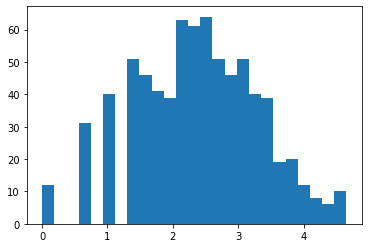

In [11]:
X_test_log = numpy.log(X_test + 1)

import matplotlib.pyplot as plt

plt.hist(X_train_log[:, 0], bins = 25)

In [13]:
#create, train and score model on log data
model = Ridge()

model.fit(X_train_log, y_train)

log_results = model.score(X_test_log, y_test)

print(log_results)

0.6394688489045481
